In [218]:
# import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LinearRegression

#to build SVM model
from sklearn.svm import SVC

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve


#to ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [187]:

df = pd.read_csv('~/Desktop/data_scientist_task/toxicity.csv')

In [188]:

df.head() 

,row,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat,label
0,0,0.593828,0.563516,0.849090,0.864632,0.777347,0.602494,Offensive
1,1,0.213193,0.407253,0.925010,0.856451,0.456983,0.592931,Offensive
2,2,0.474532,0.323574,0.710831,0.747318,0.933715,0.208848,Very offensive
3,3,0.503426,0.407557,0.796685,0.854638,0.955973,0.343336,Neutral
4,4,0.394807,0.170078,0.561849,0.766563,0.459300,0.223698,Profanity


In [189]:

df.tail()

,row,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat,label
11995,11995,0.543366,0.684481,0.951176,0.945009,0.878651,0.765876,Offensive
11996,11996,0.843702,0.877267,0.933437,0.945656,0.980018,0.476850,Very offensive
11997,11997,0.372335,0.979884,0.963483,0.945009,0.685437,0.308390,Very offensive
11998,11998,0.747068,0.906385,0.953521,0.945589,0.987091,0.926245,Very offensive
11999,11999,0.640017,0.750959,0.934347,0.945009,0.902304,0.692056,Offensive


In [190]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row                12000 non-null  int64  
 1   flirtation         12000 non-null  float64
 2   identity_attack    12000 non-null  float64
 3   insult             12000 non-null  float64
 4   severe_toxicity    12000 non-null  float64
 5   sexually_explicit  12000 non-null  float64
 6   threat             12000 non-null  float64
 7   label              12000 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 750.1+ KB


In [191]:
## Observe unique variables in the dataframe

df.nunique()

row                  12000
flirtation           11684
identity_attack      10409
insult                7420
severe_toxicity       7967
sexually_explicit     8215
threat               10554
label                    7
dtype: int64

In [192]:
## Dropping 'row' column from dataframe 
df=df.drop(['row'],axis=1)


In [193]:
## View of new dataframe
df

,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat,label
0,0.593828,0.563516,0.849090,0.864632,0.777347,0.602494,Offensive
1,0.213193,0.407253,0.925010,0.856451,0.456983,0.592931,Offensive
2,0.474532,0.323574,0.710831,0.747318,0.933715,0.208848,Very offensive
3,0.503426,0.407557,0.796685,0.854638,0.955973,0.343336,Neutral
4,0.394807,0.170078,0.561849,0.766563,0.459300,0.223698,Profanity
...,...,...,...,...,...,...,...
11995,0.543366,0.684481,0.951176,0.945009,0.878651,0.765876,Offensive
11996,0.843702,0.877267,0.933437,0.945656,0.980018,0.476850,Very offensive
11997,0.372335,0.979884,0.963483,0.945009,0.685437,0.308390,Very offensive
11998,0.747068,0.906385,0.953521,0.945589,0.987091,0.926245,Very offensive


In [194]:
## Creating numerical columns 
num_cols=['flirtation','identity_attack','insult','severe_toxicity','sexually_explicit','threat']

## Creating categorical variables
cat_cols=['label']


In [195]:
## Checking summary statistics 
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
flirtation,12000.0,0.416813,0.185237,0.029391,0.285029,0.403791,0.501138,0.949213
identity_attack,12000.0,0.438216,0.266264,0.037710,0.232623,0.353419,0.606927,0.993878
insult,12000.0,0.801580,0.162062,0.024430,0.699709,0.843521,0.936827,0.994336
severe_toxicity,12000.0,0.821883,0.095602,0.024729,0.747318,0.821408,0.894143,0.984462
sexually_explicit,12000.0,0.556574,0.286541,0.017585,0.305679,0.548136,0.820784,1.000000
threat,12000.0,0.405262,0.256686,0.026123,0.224373,0.307148,0.497426,1.000000


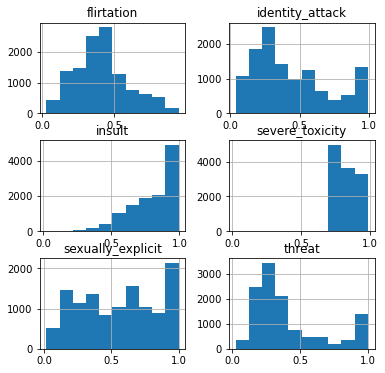

In [196]:
## Creating histograms 
df[num_cols].hist(figsize=(6,6))
plt.show()


In [197]:

for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Offensive              0.497167
Profanity              0.285833
Very offensive         0.094833
Neutral                0.067833
Extremely offensive    0.035500
Unknown                0.011667
Hate speech            0.007167
Name: label, dtype: float64
****************************************


In [198]:
## The relationships between labels and numerical variable 
df.groupby(['label'])[num_cols].mean()

,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat
label,,,,,,
Extremely offensive,0.423392,0.924664,0.909239,0.880699,0.546564,0.450820
Hate speech,0.426536,0.939899,0.908478,0.903759,0.580652,0.535012
Neutral,0.379575,0.364933,0.631381,0.745947,0.327697,0.705657
Offensive,0.423398,0.454108,0.855664,0.842912,0.588095,0.378739
Profanity,0.417297,0.262551,0.714536,0.780919,0.547663,0.313664
Unknown,0.441348,0.458553,0.517973,0.558312,0.435551,0.403991
Very offensive,0.401245,0.714278,0.888654,0.893642,0.598707,0.578815


<AxesSubplot:>

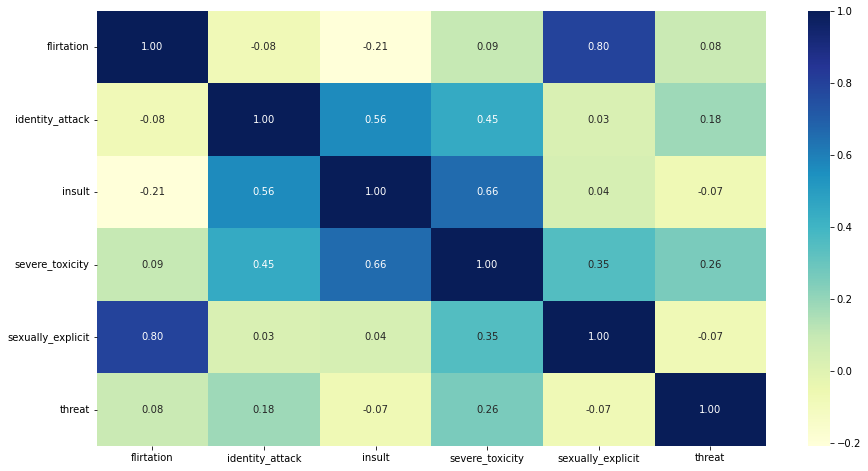

In [199]:
# Create confusion matrix to determine strongest correlation 
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [206]:
df.head()

,flirtation,identity_attack,insult,severe_toxicity,sexually_explicit,threat,label
0,0.593828,0.563516,0.849090,0.864632,0.777347,0.602494,Offensive
1,0.213193,0.407253,0.925010,0.856451,0.456983,0.592931,Offensive
2,0.474532,0.323574,0.710831,0.747318,0.933715,0.208848,Very offensive
3,0.503426,0.407557,0.796685,0.854638,0.955973,0.343336,Neutral
4,0.394807,0.170078,0.561849,0.766563,0.459300,0.223698,Profanity


In [214]:
# Deduce strongest correlating variables from dataset
df.corr()['severe_toxicity']


flirtation           0.094356
identity_attack      0.445643
insult               0.659208
severe_toxicity      1.000000
sexually_explicit    0.352226
threat               0.256016
Name: severe_toxicity, dtype: float64

Text(0, 0.5, 'toxicity')

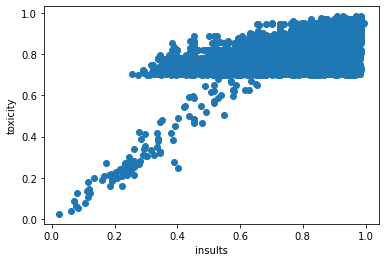

In [215]:
insults = df['insult']
toxicity = df['severe_toxicity']

plt.scatter(insults, toxicity)
plt.xlabel('insults')
plt.ylabel('toxicity')


In [216]:
insults_np = insults.to_numpy()
toxicity_np = toxicity.to_numpy()

insults_np.shape, toxicity_np.shape

((12000,), (12000,))

In [219]:
sklearn_model = LinearRegression().fit(insults_np.reshape((12000, 1)), toxicity_np)
sklearn_toxicity_predictions = sklearn_model.predict(insults_np.reshape((12000, 1)))
sklearn_toxicity_predictions.shape

(12000,)

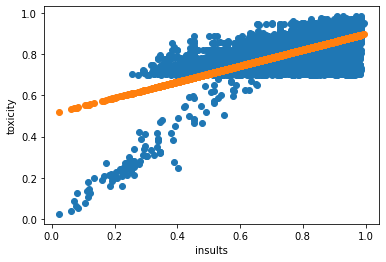

In [220]:

insults = df['insult']
toxicity = df['severe_toxicity']

plt.scatter(insults, toxicity)
plt.xlabel('insults')
plt.ylabel('toxicity')

plt.scatter(insults, sklearn_toxicity_predictions)

In [221]:
predictions_df = pd.DataFrame({'Insults':insults,
'Toxicity':toxicity,
'SK learn predictions':sklearn_toxicity_predictions})
predictions_df

,Insults,Toxicity,SK learn predictions
0,0.849090,0.864632,0.840358
1,0.925010,0.856451,0.869882
2,0.710831,0.747318,0.786593
3,0.796685,0.854638,0.819980
4,0.561849,0.766563,0.728658
...,...,...,...
11995,0.951176,0.945009,0.880057
11996,0.933437,0.945656,0.873159
11997,0.963483,0.945009,0.884843
11998,0.953521,0.945589,0.880969


In [228]:
# Assuming toxicity[i] = alpha + (beta * insults[i]) + error

def get_predictions(model, x):
    '''
    Obtain the predictions for the given model and inputs. 

    model: {'alpha_hat':Number, 'beta_hat':Number}
    x: np.array of Floats with shape (n,) of inputs

    Returns: np.array of Floats with shape (n,). 
    '''

    alpha_hat = model['alpha_hat']
    beta_hat = model['beta_hat']

    return alpha_hat + beta_hat * x

In [249]:
test_model = {'alpha_hat':0.1, 'beta_hat':0.8}
test_x = np.array([0.2, 0.4, 0.6])
get_predictions(test_model, test_x)

array([0.26, 0.42, 0.58])

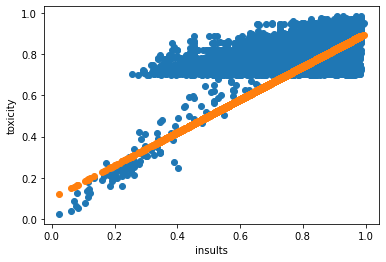

In [250]:
insults = df['insult']
toxicity = df['severe_toxicity']

plt.scatter(insults, toxicity)
plt.xlabel('insults')
plt.ylabel('toxicity')

plt.scatter(insults, get_predictions(test_model, insults_np))